<a href="https://colab.research.google.com/github/mgamzec/GeoPython/blob/main/geemap_Which_is_bigger_import_featurecollections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geemap

In [ ]:
import ee

# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=Ulr_H1-iflfSztET3Ymj20eVNdQQUXrFqcwgBNOIHO8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWgBmkzefptYna6qigPRW3fS30ykg_rcrycEeq5rrbg_W7Lm_v1vIxY

Successfully saved authorization token.


In [ ]:
# Installs geemap package
import google.colab
import geemap.eefolium as geemap

In [ ]:
import ee
import geemap

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


In [ ]:
# We get the feature collection of Administrative boundaries (level0)
countries = ee.FeatureCollection('FAO/GAUL/2015/level0').select('ADM0_NAME')

# We filter the featureCollection to get the feature we want
france = countries.filter(ee.Filter.eq('ADM0_NAME', 'France'))

In [ ]:
print(countries)

ee.FeatureCollection({
  "functionInvocationValue": {
    "functionName": "Collection.map",
    "arguments": {
      "baseAlgorithm": {
        "functionDefinitionValue": {
          "argumentNames": [
            "_MAPPING_VAR_0_0"
          ],
          "body": {
            "functionInvocationValue": {
              "functionName": "Feature.select",
              "arguments": {
                "input": {
                  "argumentReference": "_MAPPING_VAR_0_0"
                },
                "propertySelectors": {
                  "constantValue": [
                    "ADM0_NAME"
                  ]
                },
                "retainGeometry": {
                  "constantValue": true
                }
              }
            }
          }
        }
      },
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.loadTable",
          "arguments": {
            "tableId": {
              "constantValue": "FAO/GAUL/2015/level

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

#states = ee.FeatureCollection('TIGER/2018/States')

#peru = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.eq('ADM0_NAME', 'Peru'))
peru=ee.FeatureCollection("FAO/GAUL/2015/level0").filter(ee.Filter.eq('ADM0_NAME','Peru'))

#Map.centerObject(peru, 4)
Map.centerObject(peru,4)
#Map.addLayer(peru, {}, 'Countries')
Map.addLayer(peru,{},'SAM')

Map.addLayerControl()  #This line is not needed for ipyleaflet-based Map
Map

Map(center=[-9.12390421990768, -74.39882606629666], controls=(WidgetControl(options=['position', 'transparent_…

In [ ]:
Map = geemap.Map(center=[40, -100], zoom=4)

#states = ee.FeatureCollection('TIGER/2018/States')

#countries = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.inList("ADM0_NAME", ['Peru', 'Brazil', 'Colombia']))
countries = ee.FeatureCollection('FAO/GAUL/2015/level0').filter(ee.Filter.inList("ADM0_NAME", ['Peru', 'Brazil', 'Colombia','Chile']))

Map.centerObject(countries, 4)
Map.addLayer(countries, {}, 'Countries')

Map.addLayerControl()  #This line is not needed for ipyleaflet-based Map
Map

Map(center=[-10.742993724405666, -58.536755847854344], controls=(WidgetControl(options=['position', 'transpare…

In [ ]:
#states = ee.FeatureCollection('FAO/GAUL/2015/level0').sort('ADM0_NAME', False)
names = countries.aggregate_array("ADM0_NAME").getInfo()
print(names)

['Brazil', 'Peru', 'Chile', 'Colombia']


In [ ]:
areas = countries.aggregate_array("Shape_Area").getInfo()
print(areas)

[708.175861587, 106.484772681, 78.7461464718, 92.8064333529]


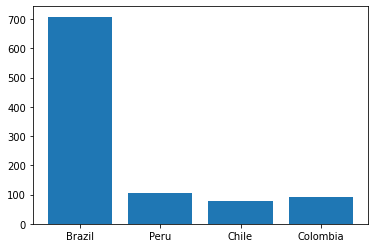

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib notebook

plt.bar(names, areas)
plt.show()